In [1]:
# test_analyze_big_database.ipynb
# Demonstrates some of the functionality of recipe_search.analyze using the main database

In [2]:
%matplotlib inline

In [3]:
# Import my recipe_search package and subpackages.
# Rename recipe_search as rs
import recipe_search
import recipe_search.database
import recipe_search.cluster
import recipe_search.search
import recipe_search.analyze
rs = recipe_search

import numpy as np
import MySQLdb

In [4]:
# Select the big database -- has ~600,000 recipes
db = rs.database.get_db("localhost","root","pwd4recDB","recipes")
cursor = rs.database.get_cursor(db)

In [5]:
# Choose an ingredient
ingred = 'mushrooms'
#ingred = 'carrots'
#ingred = 'chocolate'
#ingred = 'raisins'
#ingred = 'ears'

In [6]:
# Set up the other parameters for rs.analyze.compare_cluster_vs_random
metric = 'jaccard'
num_recipes_list = [10,20,30,40,50,60,70,80,90,100]
#num_recipes_list = [10,20,30,40,50,60,70] # Use this list of ingred='ears'
num_trials = 1 # Set to <=50 to run in <=10s
data_dir = ("/Users/amorten/Projects/RecipeSearch/Database/"
            "HClusters/")

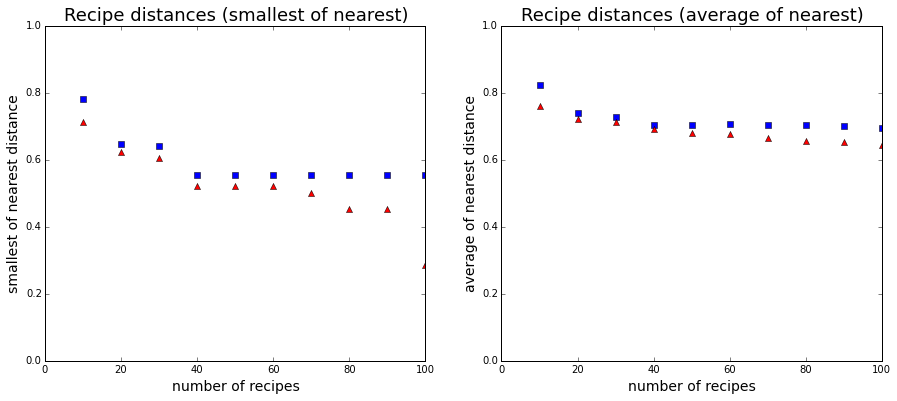

In [7]:
# Compare recipes search results using "cluster" vs "random"
rs.analyze.compare_cluster_vs_random(cursor,ingred,metric,
                          num_recipes_list,num_trials,
                          data_dir)

# Outputs a couple of plots

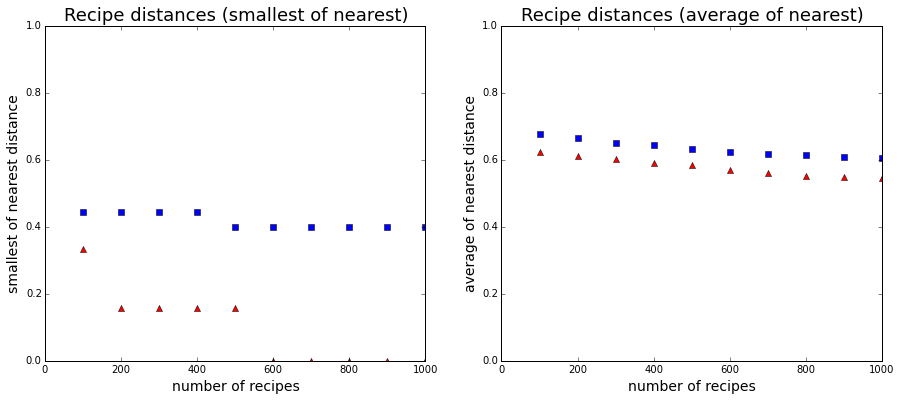

In [8]:
# Same as previous, but with num_recipes in increments of 100
num_recipes_list = [100,200,300,400,500,600,700,800,900,1000]
num_trials = 1 # Set to <=5 to run in <=10s
rs.analyze.compare_cluster_vs_random(cursor,ingred,metric,
                          num_recipes_list,num_trials,
                          data_dir)

/Users/amorten/Projects/RecipeSearch/Virtualenvs/recipeSearch3/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


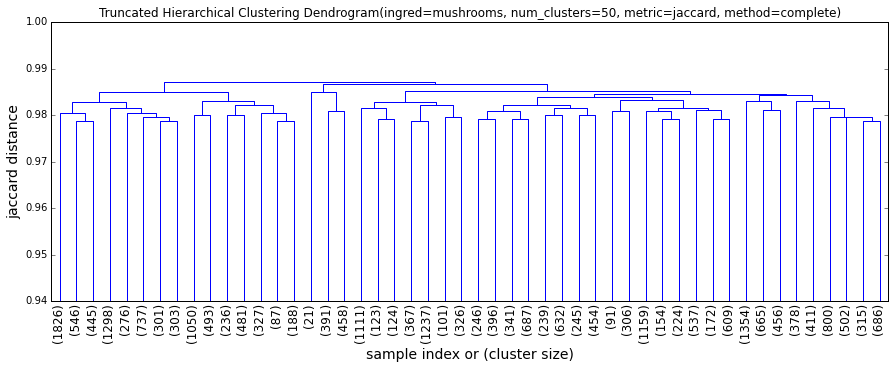

In [8]:
# Plot a dendrogram
ylim=[0.94,1.0]
rs.analyze.plot_dendrogram(ingred,metric,data_dir=data_dir,ylim=ylim)